# Decision Tree algorithm intuition

The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks. The intuition behind the Decision-Tree algorithm is very simple to understand.

The Decision Tree algorithm intuition is as follows:-

1. For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

2. For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

3. This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.

<img src="img/definition.png" width=500 heitgh=500/>

# Attribute Selection Measures
The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the attributes selection. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.

There are 2 popular attribute selection measures. They are as follows:-

- Information gain
- Gini index

While using Information gain as a criterion, we assume attributes to be categorical and for Gini index attributes are assumed to be continuous. These attribute selection measures are described below.

## Information Gain
By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called Entropy.

#### Entropy
Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

Entropy is represented by the following formula:- <br>
<img src="img/entropy-formula.png"/><br>
Here, c is the number of classes and pi is the probability associated with the ith class.

The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in entropy measure of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node.

## Gini index
Another attribute selection measure that CART (Categorical and Regression Trees) uses is the Gini index. It uses the Gini method to create split points.

Gini index can be represented with the following diagram:- <br>
<img src="img/gini-index.png"/><br>
Here, again c is the number of classes and pi is the probability associated with the ith class.

Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

Steps to Calculate Gini for a split
- Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure (p^2+q^2).
- Calculate Gini for split using weighted Gini score of each node of that split.

In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.

In [2]:
# Dataset
from sklearn.datasets import load_breast_cancer

# Model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Visualization
from sklearn.tree import plot_tree

# Dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']
df['target_names'] = [cancer['target_names'][i] for i in cancer['target']]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [9]:
df['target_names'].value_counts()

benign       357
malignant    212
Name: target_names, dtype: int64

In [23]:
# Model
X = df.drop(['target', 'target_names'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# criterion: gini or entropy
# max_depth: max depth of the tree
# min_samples_split: min number of samples required to split an internal node
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=5, random_state=101)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=101)

In [24]:
# Evaluation
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 59   7]
 [  3 102]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        66
           1       0.94      0.97      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



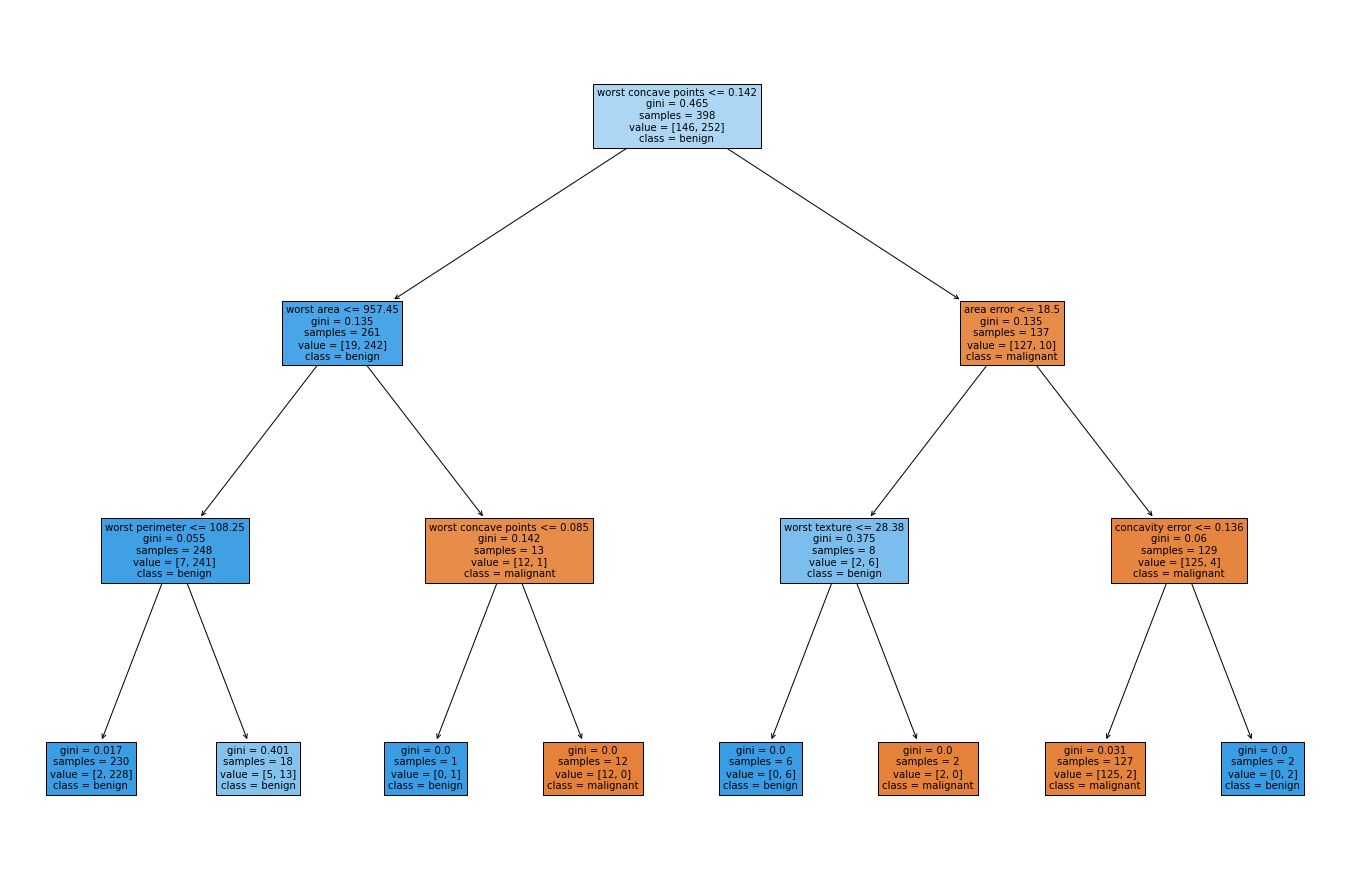

In [25]:
# Visualization
plt.figure(figsize=(24, 16))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=cancer['target_names'])
plt.show()